# Task: In this Project, we’ll use scikit-learn to answer the question:<br>“Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

## Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis
- 1) First study the dataset and the associated description of the data (i.e. “data dictionary”).<br>
- 2) Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least two other columns of your choosing.<br>
- 3) Add meaningful names for each column in the DataFrame you created to store your subset.<br>
- 4) Convert the “e”/”p” indicators in the first column to digits: for example, the “e” might become 0 and “p” might become 1. For each of the other columns in your DataFrame create a set of dummy variables. This is necessary because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. See the pandas get_dummies() method for one possible approach to doing this.<br>
- 5) Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show plots for edible/poisonous vs. odor as well as the other columns that you selected. It is up to you to decide which types of plots to use for these tasks. Include text describing your EDA findings.<br>
- 6) Include some text describing your preliminary conclusions about whether any of the other columns you’ve included in your subset (i.e., aside from the poisonous/edible indicator) could be helpful in predicting if a specific mushroom is edible or poisonous.

## Phase II: Build Predictive Models
- 1) Start with the mushroom data (including the dummy variables) in the pandas DataFrame that you constructed in
Phase I.<br>
- 2) Use scikit-learn to determine which of the predictor columns that you selected (odor and the other columns of
your choice) most accurately predicts whether or not a mushroom is poisonous. How you go about doing this
with scikit-learn is up to you as a practitioner of data analytics.<br>
- 3) Clearly state your conclusions along with any recommendations for further analysis.

## My approch to this proejct: <br>1.Loading the data/Data wrangling<br>2.EDA<br>3.Building predictive models<br>4.Evaluating the models<br>5.Conclusion/Recommendation for further analysis

### Phase I - 1) First study the dataset and the associated description of the data (i.e. “data dictionary”).

#### Data Set Information: https://archive.ics.uci.edu/ml/datasets/mushroom
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


#### Attribute Information: the very first column, edibility, either p or e, was not included in the attribute information.
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### Phase I - 2) Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least two other columns of your choosing.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data
df = pd.read_csv("https://raw.githubusercontent.com/mhan1/analytical-programming/master/mushroom.csv", 
                 names=['edibility', 
                        'cap_shape', 
                        'cap_surface',
                        'cap_color', 
                        'bruises', 
                        'odor', 
                        'gill_attachment',
                        'gill_spacing',
                        'gill_size',
                        'gill_color',
                        'stalk_shape',
                        'stalk_root',
                        'stalk_surface_above_ring',
                        'stalk_surface_below_ring',
                        'stalk_color_above_ring',
                        'stalk-color_below_ring',
                        'veil_type',
                        'veil_color',
                        'ring_number',
                        'ring_type',
                        'spore_print_color',
                        'population',
                        'habitat'                   
                       ])

In [3]:
#sanity check
df.head()

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk-color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#checking the number of rows and columns
df.shape

(8124, 23)

In [5]:
#checking the columns
df.columns

Index(['edibility', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk-color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

According to WildFoodUK(https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/), we should avoid mushrooms with white gills, a skirt or ring on the stem and a bulbous or sack like base called a volva. Also, they say we should avoide mushrooms with red on the cap or stem. <br> Hence, I will choose 'cap_color' and 'gill_color' as the other two attributes besides the 'odor' to predict the mushroom's edibility for this project.

In [6]:
#creating a pandas DataFrame with a subset of the columns in the dataset.
df1 = df[['edibility','odor','cap_color','gill_color']]
df1.head()

,edibility,odor,cap_color,gill_color
0,p,p,n,k
1,e,a,y,k
2,e,l,w,n
3,p,p,w,n
4,e,n,g,k


In [7]:
#checking the data type
type(df1)

pandas.core.frame.DataFrame

In [8]:
#checking the number of rows and columns
df1.shape

(8124, 4)

In [9]:
#checking the columns
df1.columns

Index(['edibility', 'odor', 'cap_color', 'gill_color'], dtype='object')

In [10]:
#chekcing the description of df1 dataframe
df1.describe()

,edibility,odor,cap_color,gill_color
count,8124,8124,8124,8124
unique,2,9,10,12
top,e,n,n,b
freq,4208,3528,2284,1728


### Phase I - 3) Add meaningful names for each column in the DataFrame you created to store your subset.

In [11]:
#checking the columns
df1.columns

Index(['edibility', 'odor', 'cap_color', 'gill_color'], dtype='object')

In [12]:
df1.head(3)

,edibility,odor,cap_color,gill_color
0,p,p,n,k
1,e,a,y,k
2,e,l,w,n


I already named the columns when I was loading the dataset, using "names" parameter for "read_csv" method, as above.

In [13]:
#replacing 'order' column values
df1.odor.replace({'a':'almond',             
                  'l':'anise',
                  'c':'creosote',
                  'y':'fishy',
                  'f':'foul',
                  'm':'musty',
                  'n':'none',
                  'p':'pungent',
                  's': 'spicy'}, inplace = True)
df1.head(3)

C:\Users\Minyeong\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,edibility,odor,cap_color,gill_color
0,p,pungent,n,k
1,e,almond,y,k
2,e,anise,w,n


In [14]:
#replacing 'cap_color' column values
df1.cap_color.replace({'n':'brown', 
                        'b':'buff',
                        'c':'cinnamon',
                        'g':'gray',
                        'r':'green',
                        'p':'pink',
                        'u':'purple',
                        'e':'red',
                        'w':'white',
                        'y':'yellow'}, inplace = True)
df1.head(3)

,edibility,odor,cap_color,gill_color
0,p,pungent,brown,k
1,e,almond,yellow,k
2,e,anise,white,n


In [15]:
#replacing 'gill_color' column values
df1.gill_color.replace({'k':'black',
                         'n':'brown',
                         'b':'buff',
                         'h':'chocolate',
                         'g':'gray', 
                         'r':'green',
                         'o':'orange',
                         'p':'pink',
                         'u':'purple',
                         'e':'red', 
                         'w':'white',
                         'y':'yellow'}, inplace = True)
df1.head(3)

,edibility,odor,cap_color,gill_color
0,p,pungent,brown,black
1,e,almond,yellow,black
2,e,anise,white,brown


### Phase I - 4) Convert the “e”/”p” indicators in the first column to digits: for example, the “e” might become 0 and “p” might become 1. For each of the other columns in your DataFrame create a set of dummy variables. This is necessary because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. See the pandas get_dummies() method for one possible approach to doing this.

In [16]:
#getting the dummy variables
df1_with_dum = pd.get_dummies(df1['edibility'])
df1_with_dum.head(7)

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0


In [17]:
#renaming the columns
df1_with_dum.rename(columns={"e":"edible", "p":"poisonous"}, inplace=True)
df1_with_dum.head(3)

,edible,poisonous
0,0,1
1,1,0
2,1,0


In [18]:
#combining the dummy variables with the original data. I'm keeping the original 'edibility' column.
df2 = df1.join(df1_with_dum)
df2.head(7)

,edibility,odor,cap_color,gill_color,edible,poisonous
0,p,pungent,brown,black,0,1
1,e,almond,yellow,black,1,0
2,e,anise,white,brown,1,0
3,p,pungent,white,brown,0,1
4,e,none,gray,black,1,0
5,e,almond,yellow,brown,1,0
6,e,almond,white,gray,1,0


In [19]:
#replacing the 'poisonous' with a '1', and 'edible' with a '0' in the 'edibility' column
df2.edibility.replace({'p': 1, 'e':0}, inplace=True)
df2.head()

,edibility,odor,cap_color,gill_color,edible,poisonous
0,1,pungent,brown,black,0,1
1,0,almond,yellow,black,1,0
2,0,anise,white,brown,1,0
3,1,pungent,white,brown,0,1
4,0,none,gray,black,1,0


In [20]:
#checking the number of rows and columns
df2.shape

(8124, 6)

### Phase I - 5) Perform exploratory data analysis: show the distribution of data for each of the columns you selected, <br> and show plots for edible/poisonous vs. odor as well as the other columns that you selected. It is up to you to decide which types of plots to use for these tasks. <br>Include text describing your EDA findings.

In [21]:
#checking columns
df2.columns

Index(['edibility', 'odor', 'cap_color', 'gill_color', 'edible', 'poisonous'], dtype='object')

In [22]:
#printing a concise summary of df2 dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
edibility     8124 non-null int64
odor          8124 non-null object
cap_color     8124 non-null object
gill_color    8124 non-null object
edible        8124 non-null uint8
poisonous     8124 non-null uint8
dtypes: int64(1), object(3), uint8(2)
memory usage: 269.8+ KB


In [23]:
#identifying missing values, displaying the columns that have null values
print(df2.isnull().any(axis=0))

edibility     False
odor          False
cap_color     False
gill_color    False
edible        False
poisonous     False
dtype: bool


As shown above, all of the columns do not include null values.

In [24]:
#sanity check
df2.head()

,edibility,odor,cap_color,gill_color,edible,poisonous
0,1,pungent,brown,black,0,1
1,0,almond,yellow,black,1,0
2,0,anise,white,brown,1,0
3,1,pungent,white,brown,0,1
4,0,none,gray,black,1,0


### distribution of 'edibility'

In [25]:
#getting the value counts for the 'edibility' variable, which is categorical data type.
df2['edibility'].value_counts()

0    4208
1    3916
Name: edibility, dtype: int64

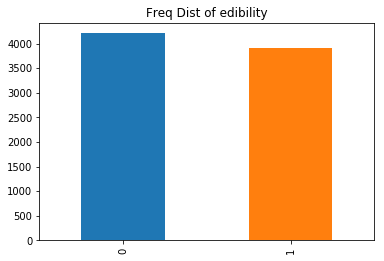

In [26]:
#creating a bar plot of the 'edibility' variable's value counts
df2['edibility'].value_counts().plot.bar(title = "Freq Dist of edibility");

Based on above, there are 4208 edible mushrooms and 3916 poisonous mushrooms in the dataset.

### distribution of 'odor'

In [27]:
#chekcing the unique values in 'odor' variable
df2['odor'].unique()

array(['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy',
       'spicy', 'musty'], dtype=object)

In [28]:
#getting the value counts for the 'odor' variable, which is categorical data type.
df2['odor'].value_counts()

none        3528
foul        2160
fishy        576
spicy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

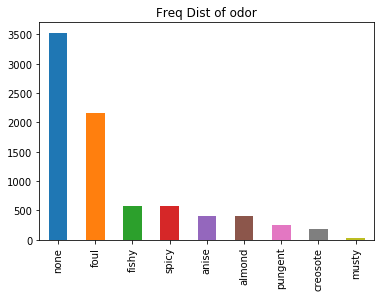

In [29]:
#creating a bar plot of the 'odor' variable's value counts
df2['odor'].value_counts().plot.bar(title = "Freq Dist of odor");

Based on above, there are nine distinct values for the 'odor' variable, and the most frequent value is 'none'(no ordor). The second most frequent value is 'foul'.

### distribution of 'cap_color'

In [30]:
#chekcing the unique values in 'cap_color' variable
df2['cap_color'].unique()

array(['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff',
       'purple', 'cinnamon', 'green'], dtype=object)

In [31]:
#getting the value counts for the 'cap-color' variable, which is categorical data type.
df2['cap_color'].value_counts()

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
green         16
purple        16
Name: cap_color, dtype: int64

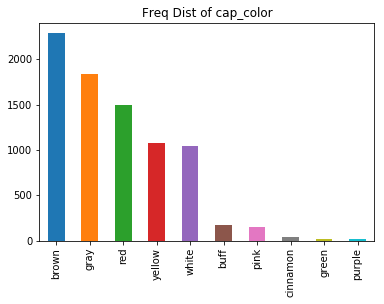

In [32]:
#creating a bar plot of the 'cap_color' variable's value counts
df2['cap_color'].value_counts().plot.bar(title = "Freq Dist of cap_color");

Based on above, there are ten distinct values for the 'cap_color' variable, and the most frequent value is 'brown'. The second most frequent value is 'gray'.

### distribution of 'gill_color'

In [33]:
#chekcing the unique values in 'gill_color' variable
df2['gill_color'].unique()

array(['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple',
       'red', 'buff', 'green', 'yellow', 'orange'], dtype=object)

In [34]:
#getting the value counts for the 'gill-color' variable, which is categorical data type.
df2['gill_color'].value_counts()

buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill_color, dtype: int64

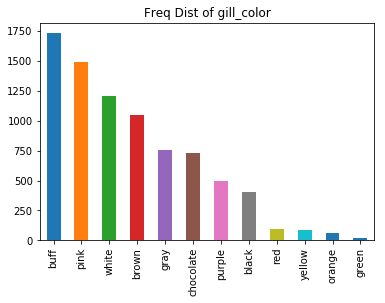

In [35]:
#creating a bar plot of the 'gill_color' variable's value counts
df2['gill_color'].value_counts().plot.bar(title = "Freq Dist of gill_color");

Based on above, there are twelve distinct values for the 'gill_color' variable, and the most frequent value is 'buff'. The second most frequent value is 'pink'.

### Plot for 'edibility' vs. 'odor'

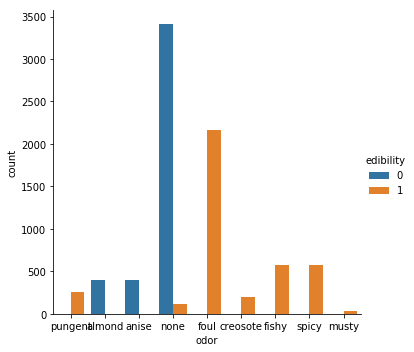

In [36]:
sns.catplot(x='odor', hue='edibility', kind='count', data=df2);

Based on the plot above, 'none' is the most frequent value for edible('0') mushroom, whereas 'foul' is the most frequent value for poisonous('1') mushroom. The distinct 'order' variable value almost exclusively accounts for either '0' or '1', rather than both values of 'edibility' variable, which means certain 'order' is a quite accurate predictor to see whether or not a mushroom is poisonous.

### plot for 'edibility' vs. 'cap_color'

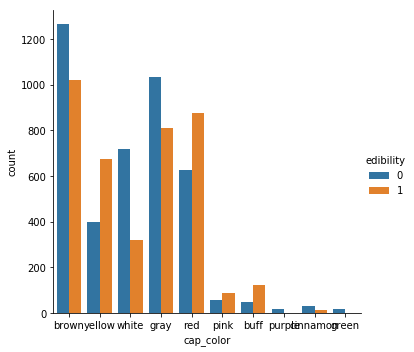

In [37]:
sns.catplot(x='cap_color', hue='edibility', kind='count', data=df2);

Based on the plot above, 'brown' is the most frequent value for both edible('0') and poisonous('1') mushroom. Since most of the distinct 'cap_color' variable value accounts for both values of 'edibility' variable, certain 'cap_color' cannot be a definite predictor to see whether or not a mushroom is poisonous.

### plot for 'edibility' vs. 'gill_color'

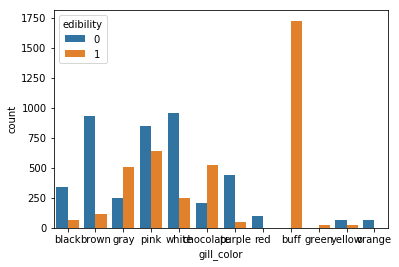

In [38]:
sns.countplot(x='gill_color', hue='edibility', data=df2);

Based on the plot above, 'buff' is the most frequent value for poisonous('1') mushroom, whereas 'white' is the most frequent value for edible('0') muchroom. Since there are several distinct 'gill_color' variable values that almost eclusively account for either '1' or '0' value of 'edibility' variable rather than both of the edibility values, certain 'gill_color' can be a quite accurate predictor to see whether or not a mushroom is poisonous.

### Phase I - 6) Include some text describing your preliminary conclusions about whether any of the other columns you’ve included in your subset (i.e., aside from the poisonous/edible indicator) could be helpful in predicting if a specific mushroom is edible or poisonous.

Based on exploratory data analysis above, I can conclude that 'order' variable is very accurate predictor to see whether or not a mushroom is poisonous, and certain 'gill_color' variable values can also be an accurate predictor to determine the edibility of mushrooms. However, most of 'cap_color' variable values account for both '0' and '1' values of 'edibility' variable, thereby making them less accurate predictor to determine the mushroom's edibility.

### Phase II - 1) Start with the mushroom data (including the dummy variables) in the pandas DataFrame that you constructed in Phase I.

In [39]:
#sanity check
df2.head()

,edibility,odor,cap_color,gill_color,edible,poisonous
0,1,pungent,brown,black,0,1
1,0,almond,yellow,black,1,0
2,0,anise,white,brown,1,0
3,1,pungent,white,brown,0,1
4,0,none,gray,black,1,0


I am going to get dummy variables for each column in dataframe df2, to be able to use those values as input to the machine learning model.

In [40]:
#getting dummy varialbes for each column that contains categorical values
df2_with_dummies = pd.get_dummies(df2)
df3 = df2_with_dummies
df3.head(3)

,edibility,edible,poisonous,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#checking the columns
df3.columns

Index(['edibility', 'edible', 'poisonous', 'odor_almond', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'cap_color_brown', 'cap_color_buff',
       'cap_color_cinnamon', 'cap_color_gray', 'cap_color_green',
       'cap_color_pink', 'cap_color_purple', 'cap_color_red',
       'cap_color_white', 'cap_color_yellow', 'gill_color_black',
       'gill_color_brown', 'gill_color_buff', 'gill_color_chocolate',
       'gill_color_gray', 'gill_color_green', 'gill_color_orange',
       'gill_color_pink', 'gill_color_purple', 'gill_color_red',
       'gill_color_white', 'gill_color_yellow'],
      dtype='object')

In [42]:
#checking the number of rows and columns of df3
df3.shape

(8124, 34)

In [43]:
#printing a concise summary of dataframe df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 34 columns):
edibility               8124 non-null int64
edible                  8124 non-null uint8
poisonous               8124 non-null uint8
odor_almond             8124 non-null uint8
odor_anise              8124 non-null uint8
odor_creosote           8124 non-null uint8
odor_fishy              8124 non-null uint8
odor_foul               8124 non-null uint8
odor_musty              8124 non-null uint8
odor_none               8124 non-null uint8
odor_pungent            8124 non-null uint8
odor_spicy              8124 non-null uint8
cap_color_brown         8124 non-null uint8
cap_color_buff          8124 non-null uint8
cap_color_cinnamon      8124 non-null uint8
cap_color_gray          8124 non-null uint8
cap_color_green         8124 non-null uint8
cap_color_pink          8124 non-null uint8
cap_color_purple        8124 non-null uint8
cap_color_red           8124 non-null uint8
cap_color_whi

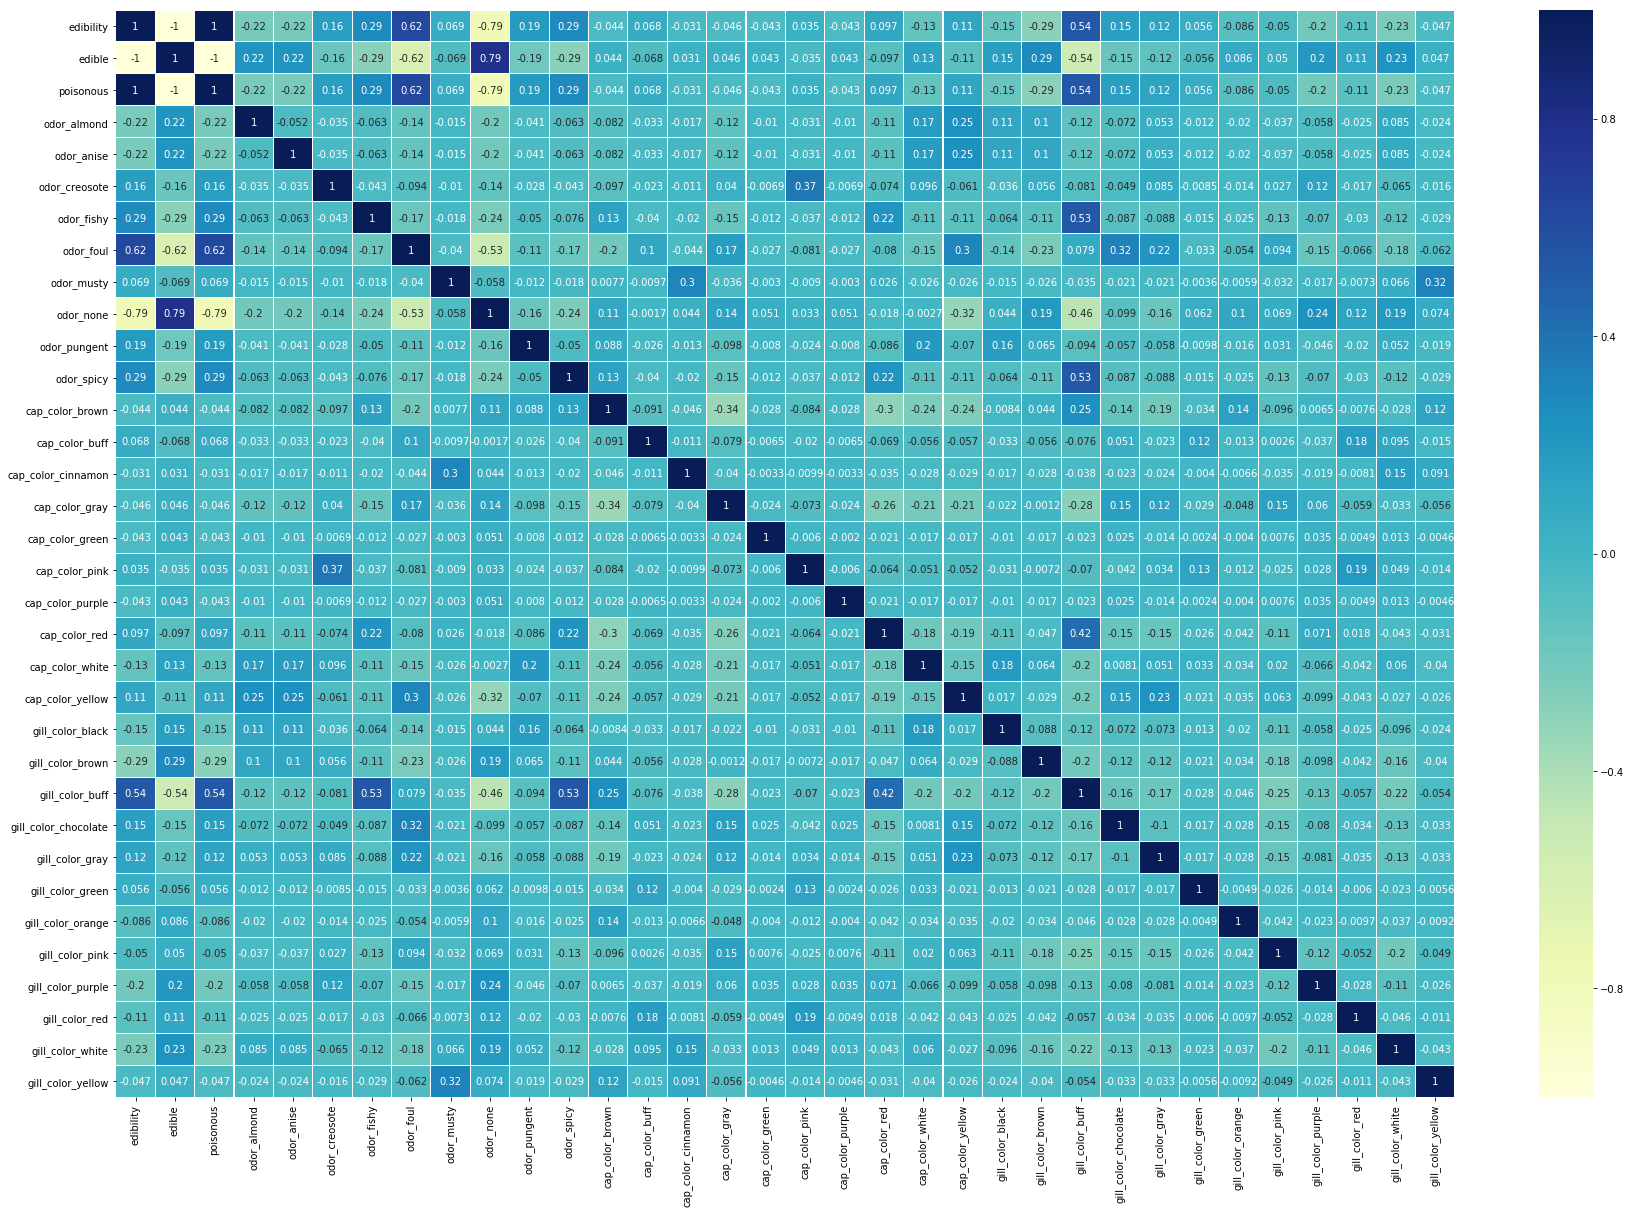

In [44]:
#creating the heatmap using the dummy variables in df3 dataframe
plt.figure(figsize=(30,20))
sns.heatmap(df3.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### Phase II - 2) Use scikit-learn to determine which of the predictor columns that you selected (odor and the other columns of your choice) most accurately predicts whether or not a mushroom is poisonous. How you go about doing this with scikit-learn is up to you as a practitioner of data analytics.

Since the response variable is a binary categorical variable, while the explanatory variables are dummy variables created from the values of a categorical variable, I will use logistic regression for the regression model, using scikit-learn.<br> This project is classification, a supervised learning in which the response is categorical. 

In [45]:
#sanity check
df3.head(3)

,edibility,edible,poisonous,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#pulling out the explanatory(independent) variables
X = df3.drop(['edibility', 'edible', 'poisonous'], axis=1)
X.head(3)

,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,cap_color_brown,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#pulling out the response(dependent) variable
y = df3[['edibility']]
y.head(3)

,edibility
0,1
1,0
2,0


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 31 columns):
odor_almond             8124 non-null uint8
odor_anise              8124 non-null uint8
odor_creosote           8124 non-null uint8
odor_fishy              8124 non-null uint8
odor_foul               8124 non-null uint8
odor_musty              8124 non-null uint8
odor_none               8124 non-null uint8
odor_pungent            8124 non-null uint8
odor_spicy              8124 non-null uint8
cap_color_brown         8124 non-null uint8
cap_color_buff          8124 non-null uint8
cap_color_cinnamon      8124 non-null uint8
cap_color_gray          8124 non-null uint8
cap_color_green         8124 non-null uint8
cap_color_pink          8124 non-null uint8
cap_color_purple        8124 non-null uint8
cap_color_red           8124 non-null uint8
cap_color_white         8124 non-null uint8
cap_color_yellow        8124 non-null uint8
gill_color_black        8124 non-null uint8
gill_color_br

In [49]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
edibility    8124 non-null int64
dtypes: int64(1)
memory usage: 63.5 KB


### 1) Using 'odor' variable as predictor : In the EDA step above, I found that 'odor' variable is a quite accurate predictor. Hence, I want to use 'odor' as predictor here.

In [50]:
import patsy
from patsy import *

In [51]:
#creating dataframes with an intercept column and dummy variables
y_odor, X_odor = dmatrices('edibility ~ odor_almond + odor_anise + odor_creosote \
                           + odor_fishy + odor_foul + odor_musty + odor_none \
                           + odor_pungent + odor_spicy',
                           df3, return_type='dataframe')   
print (X_odor.columns)
X_odor.head(3)

Index(['Intercept', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy',
       'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy'],
      dtype='object')


,Intercept,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#flattening y into a 1-D array
y_odor = np.ravel(y_odor)
y_odor

array([1., 0., 0., ..., 0., 1., 0.])

In [53]:
import sklearn

In [54]:
from sklearn.linear_model import LogisticRegression

#instantiating a logistic regression model, and fitting with X_odor and y_odor
model1 = LogisticRegression()
model1 = model1.fit(X_odor, y_odor)

#checking the accurcy on the training set
model1.score(X_odor, y_odor)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9852289512555391

Based on above, by using 'odor' variable only, we can predict if the mushroom is poisonous or not with 98.52% accuracy.

In [55]:
#examining the coefficients
pd.DataFrame(list(zip(X_odor.columns, np.transpose(model1.coef_))))

,0,1
0,Intercept,[0.8839671067637811]
1,odor_almond,[-5.961666958267549]
2,odor_anise,[-5.961666958267549]
3,odor_creosote,[2.5506462431732513]
4,odor_fishy,[3.3658645663959326]
5,odor_foul,[4.424063736289377]
6,odor_musty,[1.413158955404316]
7,odor_none,[-5.071454451843762]
8,odor_pungent,[2.7591574074850724]
9,odor_spicy,[3.3658645663959326]


Based on above, 'almond', 'anise', 'none' odors are positively associated with 'edible'(a '0' variable value) mushroom, and 'foul', 'fishy', 'spicy', 'pungent', 'creosote', 'musty' odors are positively associated with 'poisonous'(a '1' variable value) mushroom. Hence, no odor or fragrant mushrooms are more likely to be edible, rather than "smelly" mushrooms.

### 2) Using 'odor' and 'gill_color' variables as predictor : In the EDA step above, I found that 'gill_color' also can be a good predictor besides 'odor', so I am using both variables for the model.

In [56]:
#creating dataframes with an intercept column and dummy variables
y_og, X_og = dmatrices('edibility ~ odor_almond + odor_anise + odor_creosote + odor_fishy \
                        + odor_foul + odor_musty + odor_none + odor_pungent + odor_spicy \
                        + gill_color_black + gill_color_brown + gill_color_buff \
                        + gill_color_chocolate + gill_color_gray + gill_color_green \
                        + gill_color_orange + gill_color_pink + gill_color_purple \
                        + gill_color_red + gill_color_white + gill_color_yellow',
                           df3, return_type='dataframe')   
print (X_og.columns)
X_og.head(3)

Index(['Intercept', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy',
       'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy',
       'gill_color_black', 'gill_color_brown', 'gill_color_buff',
       'gill_color_chocolate', 'gill_color_gray', 'gill_color_green',
       'gill_color_orange', 'gill_color_pink', 'gill_color_purple',
       'gill_color_red', 'gill_color_white', 'gill_color_yellow'],
      dtype='object')


,Intercept,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#flattening y into a 1-D array
y_og = np.ravel(y_og)
y_og

array([1., 0., 0., ..., 0., 1., 0.])

In [58]:
#instantiating a logistic regression model, and fitting with X_og and y_og
model2 = LogisticRegression()
model2 = model2.fit(X_og, y_og)

#checking the accurcy on the training set
model2.score(X_og, y_og)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9881831610044313

Based on above, by using 'odor' and 'gill_color' variables together as predicotrs, the model became better in terms of accuracy as we can predict if the mushroom is poisonous or not with 98.82% accuracy, which is higher accuracy than 98.52% by using 'odor' variable alone.

### 3) Using 'odor' and 'cap_color' variables as predictor : In the EDA step above, I found that 'cap_color' can be a predictor with caution, as there are overlapped cap color for both 'edible' and 'poisonous' mushrooms. However, I want to examine if combining 'cap_color' and 'odor' can make a better model to predict the mushroom's edibility.

In [59]:
#creating dataframes with an intercept column and dummy variables
y_oc, X_oc = dmatrices('edibility ~ odor_almond + odor_anise + odor_creosote + odor_fishy \
                        + odor_foul + odor_musty + odor_none + odor_pungent + odor_spicy \
                        + cap_color_brown + cap_color_buff + cap_color_cinnamon \
                        + cap_color_gray + cap_color_green + cap_color_pink \
                        + cap_color_purple + cap_color_red + cap_color_white + cap_color_yellow',
                           df3, return_type='dataframe')   
print (X_oc.columns)
X_oc.head(3)

Index(['Intercept', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy',
       'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy',
       'cap_color_brown', 'cap_color_buff', 'cap_color_cinnamon',
       'cap_color_gray', 'cap_color_green', 'cap_color_pink',
       'cap_color_purple', 'cap_color_red', 'cap_color_white',
       'cap_color_yellow'],
      dtype='object')


,Intercept,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
#flattening y into a 1-D array
y_oc = np.ravel(y_oc)
y_oc

array([1., 0., 0., ..., 0., 1., 0.])

In [61]:
#instantiating a logistic regression model, and fitting with X_oc and y_oc
model3 = LogisticRegression()
model3 = model3.fit(X_oc, y_oc)

#checking the accurcy on the training set
model3.score(X_oc, y_oc)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9852289512555391

Based on above, by using 'odor' and 'cap_color' variables together as predicotrs, the model did not become better in terms of accuracy as we can predict if the mushroom is poisonous or not with 98.52% accuracy, which is the same as 98.52% by using 'odor' variable alone.

### 4) Using 'gill-color' and 'cap_color' variables as predictor : In the EDA step above, I found that 'gill_color' is a good predictor besides 'odor', but 'cap_color' can be a predictor with caution, as there are overlapped cap color for both 'edible' and 'poisonous' mushrooms. However, I want to examine if combining 'gill_color' and 'cap_color' can make a model any better to predict the mushroom's edibility.

In [62]:
#creating dataframes with an intercept column and dummy variables
y_gc, X_gc = dmatrices('edibility ~ gill_color_black + gill_color_brown + gill_color_buff \
                        + gill_color_chocolate + gill_color_gray + gill_color_green \
                        + gill_color_orange + gill_color_pink + gill_color_purple \
                        + gill_color_red + gill_color_white + gill_color_yellow \
                        + cap_color_brown + cap_color_buff + cap_color_cinnamon \
                        + cap_color_gray + cap_color_green + cap_color_pink \
                        + cap_color_purple + cap_color_red + cap_color_white + cap_color_yellow',
                        df3, return_type='dataframe')   
print (X_gc.columns)
X_gc.head(3)

Index(['Intercept', 'gill_color_black', 'gill_color_brown', 'gill_color_buff',
       'gill_color_chocolate', 'gill_color_gray', 'gill_color_green',
       'gill_color_orange', 'gill_color_pink', 'gill_color_purple',
       'gill_color_red', 'gill_color_white', 'gill_color_yellow',
       'cap_color_brown', 'cap_color_buff', 'cap_color_cinnamon',
       'cap_color_gray', 'cap_color_green', 'cap_color_pink',
       'cap_color_purple', 'cap_color_red', 'cap_color_white',
       'cap_color_yellow'],
      dtype='object')


,Intercept,gill_color_black,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,...,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
#flattening y into a 1-D array
y_gc = np.ravel(y_gc)
y_gc

array([1., 0., 0., ..., 0., 1., 0.])

In [64]:
#instantiating a logistic regression model, and fitting with X_gc and y_gc
model4 = LogisticRegression()
model4 = model4.fit(X_gc, y_gc)

#checking the accurcy on the training set
model4.score(X_gc, y_gc)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8441654357459379

Based on above, by using 'gill_color' and 'cap_color' variables together as predicotrs, the model did not become any better in terms of accuracy as we can predict if the mushroom is poisonous or not with 84.42% accuracy, which is the lower than any other models' accuracy so far.

### 5) Using 'odor', 'gill-color' and 'cap_color' variables as predictor : In the EDA step above, I found that 'odor and 'gill_color' are good predictors, but 'cap_color' can be a predictor with caution, as there are overlapped cap color for both 'edible' and 'poisonous' mushrooms. This time, I want to examine if combining all of the three 'odor', 'gill_color' and 'cap_color' variables together can make a better model to predict the mushroom's edibility.

In [65]:
#creating dataframes with an intercept column and dummy variables
y_ogc, X_ogc = dmatrices('edibility ~ odor_almond + odor_anise + odor_creosote + odor_fishy \
                        + odor_foul + odor_musty + odor_none + odor_pungent + odor_spicy \
                        + gill_color_black + gill_color_brown + gill_color_buff \
                        + gill_color_chocolate + gill_color_gray + gill_color_green \
                        + gill_color_orange + gill_color_pink + gill_color_purple \
                        + gill_color_red + gill_color_white + gill_color_yellow \
                        + cap_color_brown + cap_color_buff + cap_color_cinnamon \
                        + cap_color_gray + cap_color_green + cap_color_pink \
                        + cap_color_purple + cap_color_red + cap_color_white + cap_color_yellow',
                        df3, return_type='dataframe')   
print (X_ogc.columns)
X_ogc.head(3)

Index(['Intercept', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy',
       'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy',
       'gill_color_black', 'gill_color_brown', 'gill_color_buff',
       'gill_color_chocolate', 'gill_color_gray', 'gill_color_green',
       'gill_color_orange', 'gill_color_pink', 'gill_color_purple',
       'gill_color_red', 'gill_color_white', 'gill_color_yellow',
       'cap_color_brown', 'cap_color_buff', 'cap_color_cinnamon',
       'cap_color_gray', 'cap_color_green', 'cap_color_pink',
       'cap_color_purple', 'cap_color_red', 'cap_color_white',
       'cap_color_yellow'],
      dtype='object')


,Intercept,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,...,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
#flattening y into a 1-D array
y_ogc = np.ravel(y_ogc)
y_ogc

array([1., 0., 0., ..., 0., 1., 0.])

In [67]:
#instantiating a logistic regression model, and fitting with X_ogc and y_ogc
model5 = LogisticRegression()
model5 = model5.fit(X_ogc, y_ogc)

#checking the accurcy on the training set
model5.score(X_ogc, y_ogc)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9881831610044313

Based on above, by using all of the three 'odor', 'gill_color', 'cap_color variables together as predicotrs, the model became better in terms of accuracy as we can predict if the mushroom is poisonous or not with 98.82% accuracy, which is higher accuracy than 98.52% by using 'odor' variable alone.

In [68]:
#examining the coefficients
pd.DataFrame(list(zip(X_ogc.columns, np.transpose(model5.coef_))))

,0,1
0,Intercept,[0.6977134576135609]
1,odor_almond,[-7.013884515336485]
2,odor_anise,[-7.013884515336486]
3,odor_creosote,[3.924602203127732]
4,odor_fishy,[1.8207770238032293]
5,odor_foul,[5.597302269835393]
6,odor_musty,[1.9044427281962881]
7,odor_none,[-4.408624090963256]
8,odor_pungent,[4.066205330485595]
9,odor_spicy,[1.8207770238032273]


Based on above, increases in being 'smelly' mushroom correspond to a decrease in the likelihood of edibility. Fragrant or no odor such as 'almond', 'anise', 'none' are good indicator of being edible, and "bad" smell such as 'foul', ''pungent', 'creosote', 'musty', 'fishy', 'spicy' are indicator of being poisonous mushroom. <br> For the gill_color variable, the lowest likelihood of being poisonous mushroom corresponds to the 'red', since the coefficient is the lowest. The most likelihood of being poisonous mushroom corresponds to 'buff', 'green', 'gray', 'white', 'yellow' in order, and the most likelihood of being edible mushroom corresponds to 'red', 'brown', 'balck', 'purple', 'pink', 'chocolate', 'orange' in order.<br> For the cap_color variable, the most likelihood of being poisonous mushroom corresponds to the "yellow" since the coefficient is the highest. 'yellow', 'buff', 'pink', 'white' are more likely to be poisonous, and 'red', 'gray', 'cinnamon', 'brown', 'purple','green' are more likely to be edible. 

### Model evaluation using a validation set: I have trained and tested on the same data set so far, and now I will split the data into a training set and a testing set and check the accuracy.

In [69]:
#sanity check
X.head(3)

,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,cap_color_brown,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X.shape

(8124, 31)

In [71]:
#sanity check
y.head(3)

,edibility
0,1
1,0
2,0


In [72]:
#flattening y into a 1-D array
y = np.ravel(y)
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [73]:
y.shape

(8124,)

In [74]:
import sklearn
from sklearn.model_selection import train_test_split

# evaluating the model by splitting into train and test sets, using 75% of dataset as training set, 25% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4) 
model6 = LogisticRegression()
model6.fit(X_train, y_train)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
#predicting class labels for the test set
predicted = model6.predict(X_test)
print (predicted)
len(predicted)

[0 1 1 ... 0 0 1]


2031

In [76]:
#generating class probabilities
probs = model6.predict_proba(X_test)
print (probs)
len(probs)

[[9.96172658e-01 3.82734162e-03]
 [4.47019627e-02 9.55298037e-01]
 [7.58095235e-05 9.99924190e-01]
 ...
 [9.84897910e-01 1.51020897e-02]
 [9.96732168e-01 3.26783192e-03]
 [1.00018743e-02 9.89998126e-01]]


2031

In [77]:
#examining the predicted class labels and probabilities
pd.DataFrame(list(zip(np.transpose(predicted), (probs))))

,0,1
0,0,"[0.99617265837527, 0.0038273416247299255]"
1,1,"[0.04470196271652971, 0.9552980372834703]"
2,1,"[7.580952351915471e-05, 0.9999241904764808]"
3,0,"[0.9848979103386909, 0.015102089661309118]"
4,1,"[0.0001563757832008239, 0.9998436242167992]"
5,0,"[0.9806485394715245, 0.019351460528475452]"
6,0,"[0.9848979103386909, 0.015102089661309118]"
7,0,"[0.9564587148213479, 0.04354128517865213]"
8,1,"[0.013703486652130392, 0.9862965133478696]"
9,0,"[0.9525313843439336, 0.047468615656066394]"


Based on above, the classifier is predicting a 1 (poisonous) when the probability in the second column is close to 1.

### Generating evaluation metrics

In [78]:
from sklearn import metrics

# generating evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.9886755292959133
0.9992083341443002


Based on above, the accuracy is now 99%, which is better than using the same data for training and predicting with which the accuracy was 98.82%.

### Generating confusion matrix and a classification report

In [79]:
# generating the confusion matrix and a classification report
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[1076    0]
 [  23  932]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1076
           1       1.00      0.98      0.99       955

   micro avg       0.99      0.99      0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class. Among 2031 test data points, 1076 data points were correctly predicted as edible mushroom, and 932 data points were correctly predicted as poisonous mushroom while 23 data points were predicted as edible when they are actually poisonous. <br>For the classification report, the reported averages include micro average (averaging the total true positives, false negatives and false positives), macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label). In binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”. The f1-score gives me the harmonic mean of precision and recall. The scores corresponding to either 'edible'(class '0') or 'poisonous'(class '1') tells me the accuracy of the classifier in classifying the data points in each class, which is 0.99 for both classes as shown above. 1076 data points among 2031 test data points were classified as 'edible'(class '0') and 955 data points were classified as 'poisonou'(class '1'). Hence, by using train_test_split, the model could predict the mushroom's edibility with better accuracy of 99%, than using the same data for training and predicting with which the accuracy was 98.82%.

### Model evaluation using cross-validation

In [80]:
#sanity check
X.head(3)

,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,cap_color_brown,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X.shape

(8124, 31)

In [82]:
#sanity check
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
y.shape

(8124,)

In [84]:
from sklearn.model_selection import cross_val_score

#evaluating the model using 10-fold(generally recommended) cross-validation, by dividing the observations into 10.
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)

C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

[0.76383764 0.99876999 0.99507995 0.98769988 0.95325953 0.9495695
 1.         1.         0.93341554 0.99630086]


C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
#calculating average accuracy as an estimate of out-of-sample accuracy
print (scores.mean())

0.9577932881671603


Based on above, the average accuracy for out-of-sample prediction is 95.78% when using cross-validation. For my dataset, by using train_test_split, the Logistic regression model turned out to predict the mushroom's edibility with the best accuracy of 99%, compared with using the same data set for both training and predicting with the accuracy of 98.82%, and using the 10-fold cross-validation with the accuracy of 95.78%.

### Phase II - 3) Clearly state your conclusions along with any recommendations for further analysis.

 In conclusion, the logistic regression model that I used to predict the mushroom's edibility was accurate enough as evaluated above. From the EDA steps above, I could find that 'odor' variable is going to be an accurate predictor to see if mushroom is edible or poisonous. 'odor' variable alone could predict if the mushroom is poisonous or not with 98.52% accuracy. By combining 'gill_color" variable, the model became better by predicting the edibility with 98.82% accuracy than using 'odor' varialbe alone. However, by combining 'cap_color' with either 'odor' or 'gill_color' did not make the model better in terms of accuracy. When combining all of the three 'odor', 'gill_color', 'cap_color' varialbes together, the model's accuracy was 98.82%, which is higher accuracy than 98.52% by using 'odor' varialbe alone. Therefore, I can conclude that besides 'odor' variable, 'gill_color' is the best predictor of whether a particular mushroom is poisonous or edible. <br> For further analysis, I want to try KNeighborsClassifier model to compare the accuracy with the Logistric regression model that I have used in this project. <br>Also I would recommend to select the best attributes(independent variables) after evaluating them by exploratory data analysis(EDA), instead of using "domain knowledge" that I used in this project, such as suggestions from WildFoodUK(https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/) on how to avoid poisonous muchroom. Because we selected a subset of dataset before EDA, we did not have a chance to evaluate every single independent variable in the dataset before we selected the independent variables to analyze in this project. Hence, by selecting the best attributes after the EDA for further analysis, I will be able to make the model even better predict the response variable with better accuracy.